<a href="https://colab.research.google.com/github/RamSaw/image-processing/blob/master/Copy_of_hw1_hse_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***HSE2020 HW1 <Фамилия Имя>***

soft deadline: 02.02.2020T23:59:00+0300

hard deadline: 09.02.2020T23:59:00+0300

# Студент: Правилов Михаил

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

Ответ: когда мы заходим в темную комнату из светлого помещения, то у нас происходит яркостная адаптация глаза. Зрачки расширяются, а также изменяется чувствительность колбочек и палочек (она увеличивается).



##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

Данное выражение это по сути СЛАУ, т.е. Ax = y_new. Чтобы можно было без потерь информации переходить из одного пространства в другое, матрица A просто должна быть обратима, т.е. определитель не равен нулю. Чтобы новые значения цветов тоже лежали внутри куба со стороной один, достаточно чтобы норма матрицы была бы не больше единицы. 

P.S. тут давайте считать, что у нас вектора (R, G, B, 1), чтобы свободный коэффициент зацепить.

Пояснение:

1. Посмотрим на это выражение, как $y = Ax + b$, где $A \in R^{3 * 3}, b \in R^{3}$. $y = Ax + b <=> y - b = Ax <=> A^{-1}(y - b) = x$. Таким образом, чтобы без потерь переходить между пространствами, достаточно иметь обратимую матрицу A, что равносильно тому, что $det(A) \neq 0$

2. А вот, чтобы оставаться всегда в кубе со стороной 1, давайте посмотрим на это выражение немного по другому: $y = Ax$, где $A \in R^{3 * 4}, x \in R^{4}$. $x = (r, g, b, 1)$. $A$ это просто все коэффициенты $a_{ij}$. Чтобы новое пространство заполняло плотно куб со стороной 1 достаточно, чтобы линейное преобразование не сжимало и не расширяло пространство, т.е. $||A|| = 1$.

## Практический блок

In [0]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

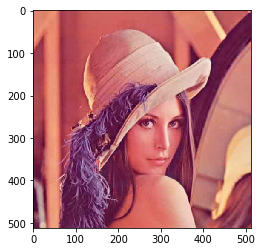

In [0]:
lena = cv2.imread("lena.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
plt.imshow(lena)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

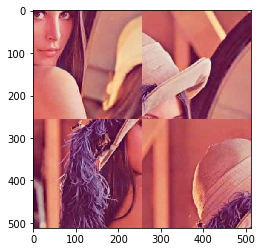

In [0]:
lena_partitioned = lena.copy()
part_lena_1 = lena_partitioned[:256, :256].copy()
part_lena_2 = lena_partitioned[256:, 256:].copy()
lena_partitioned[:256, :256] = part_lena_2
lena_partitioned[256:, 256:] = part_lena_1
plt.imshow(lena_partitioned)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

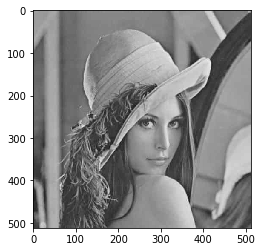

In [0]:
lena_gray_my = np.mean(lena, axis=-1)
plt.imshow(lena_gray_my, cmap='gray')

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

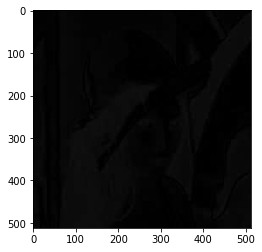

In [0]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
lena_gray_diff = np.abs(lena_gray_my - lena_gray_cvt)
plt.imshow(lena_gray_diff, cmap='gray', vmin=0, vmax=255)

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

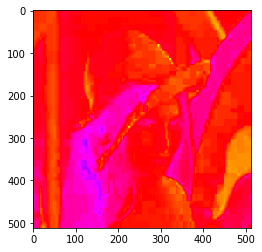

In [0]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
lena_hsv[:, :, 1:] = 255
lena_back_from_hsv = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(lena_back_from_hsv)

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

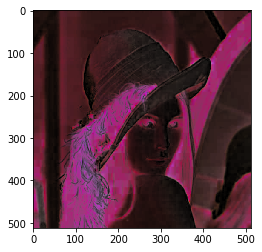

In [0]:
lena_hsv_2 = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
#plt.imshow(lena_hsv_2)
lena_hsv_2[:, :, 2] = 255 - lena_hsv_2[:, :, 2]
#plt.imshow(lena_hsv_2)
lena_back_from_hsv_2 = cv2.cvtColor(lena_hsv_2, cv2.COLOR_HSV2RGB)
plt.imshow(lena_back_from_hsv_2)

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

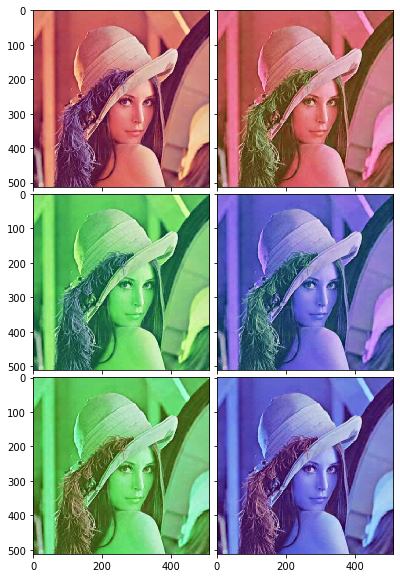

In [0]:
from mpl_toolkits.axes_grid1 import ImageGrid
from itertools import permutations
images = []
for permutation in permutations([0, 1, 2]):
  images.append(lena[:, :, permutation])
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 2), axes_pad=0.1)
for ax, im in zip(grid, images):
    ax.imshow(im)
plt.show()

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

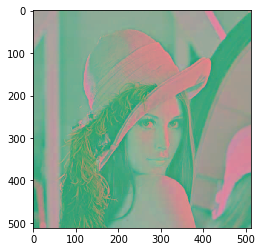

In [0]:
lena_lab_cv = cv2.cvtColor(lena, cv2.COLOR_RGB2LAB)
plt.imshow(lena_lab_cv)

In [0]:
def xyz_2_lab(img):
  def f(t):
    threshold = (6 / 29) ** 3
    t[t > threshold] = np.power(t[t > threshold], 1 / 3)
    t[t <= threshold] = 1 / 3 * (29 / 6) * (29 / 6) * t[t <= threshold] + 4 / 29
    return t
  lab_img = img.copy()
  X_n = 0.95047
  Y_n = 1.0
  Z_n = 1.08883
  lab_img[:, :, 0] = (116 * f(img[:, :, 1] / Y_n) - 16) * 2.55
  lab_img[:, :, 1] = 500 * (f(img[:, :, 0] / X_n) - f(img[:, :, 1] / Y_n)) + 128
  lab_img[:, :, 2] = 200 * (f(img[:, :, 1] / Y_n) - f(img[:, :, 2] / Z_n)) + 128
  return lab_img

def expand_gamma(img):
  threshold = 0.04045
  img[img <= threshold] = 25 * img[img <= threshold] / 323
  img[img > threshold] = np.power((200 * img[img > threshold] + 11) / 211, 12 / 5)
  return img

def srgb_2_xyz(img):
  xyz_img = img.copy()
  xyz_img = xyz_img / 255
  xyz_img = expand_gamma(xyz_img)
  A = np.array([
                [0.4124, 0.3576, 0.1805],
                [0.2126, 0.7152, 0.0722],
                [0.0193, 0.1192, 0.9505]
              ])
  xyz_img = np.dot(xyz_img, A.T)
  return xyz_img

def srgb_2_lab(img):
  return xyz_2_lab(srgb_2_xyz(img))

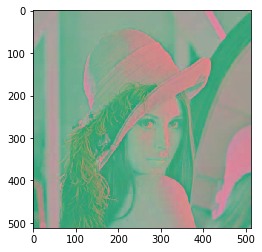

In [0]:
lena_lab_my = srgb_2_lab(lena).astype('int')
plt.imshow(lena_lab_my)

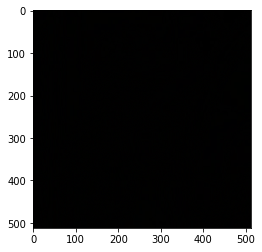

In [0]:
lena_lab_diff = np.abs(lena_lab_my - lena_lab_cv)
plt.imshow(lena_lab_diff, vmin=0, vmax=255)